In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#read coded data set
df = pd.read_csv('Coded_Data.csv')

In [3]:
df.head()

,Unnamed: 0,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


In [4]:
#remove index column
df = pd.read_csv('Coded_Data.csv', index_col = 0)
df.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Cd_1      1000 non-null float64
Cd_2      1000 non-null float64
Cd_3      1000 non-null float64
Cd_4      1000 non-null float64
Cd_5      1000 non-null float64
Cd_6      1000 non-null float64
Cd_7      1000 non-null float64
Cd_8      1000 non-null float64
Cd_9      1000 non-null float64
Cd_10     1000 non-null float64
Result    1000 non-null object
dtypes: float64(10), object(1)
memory usage: 93.8+ KB


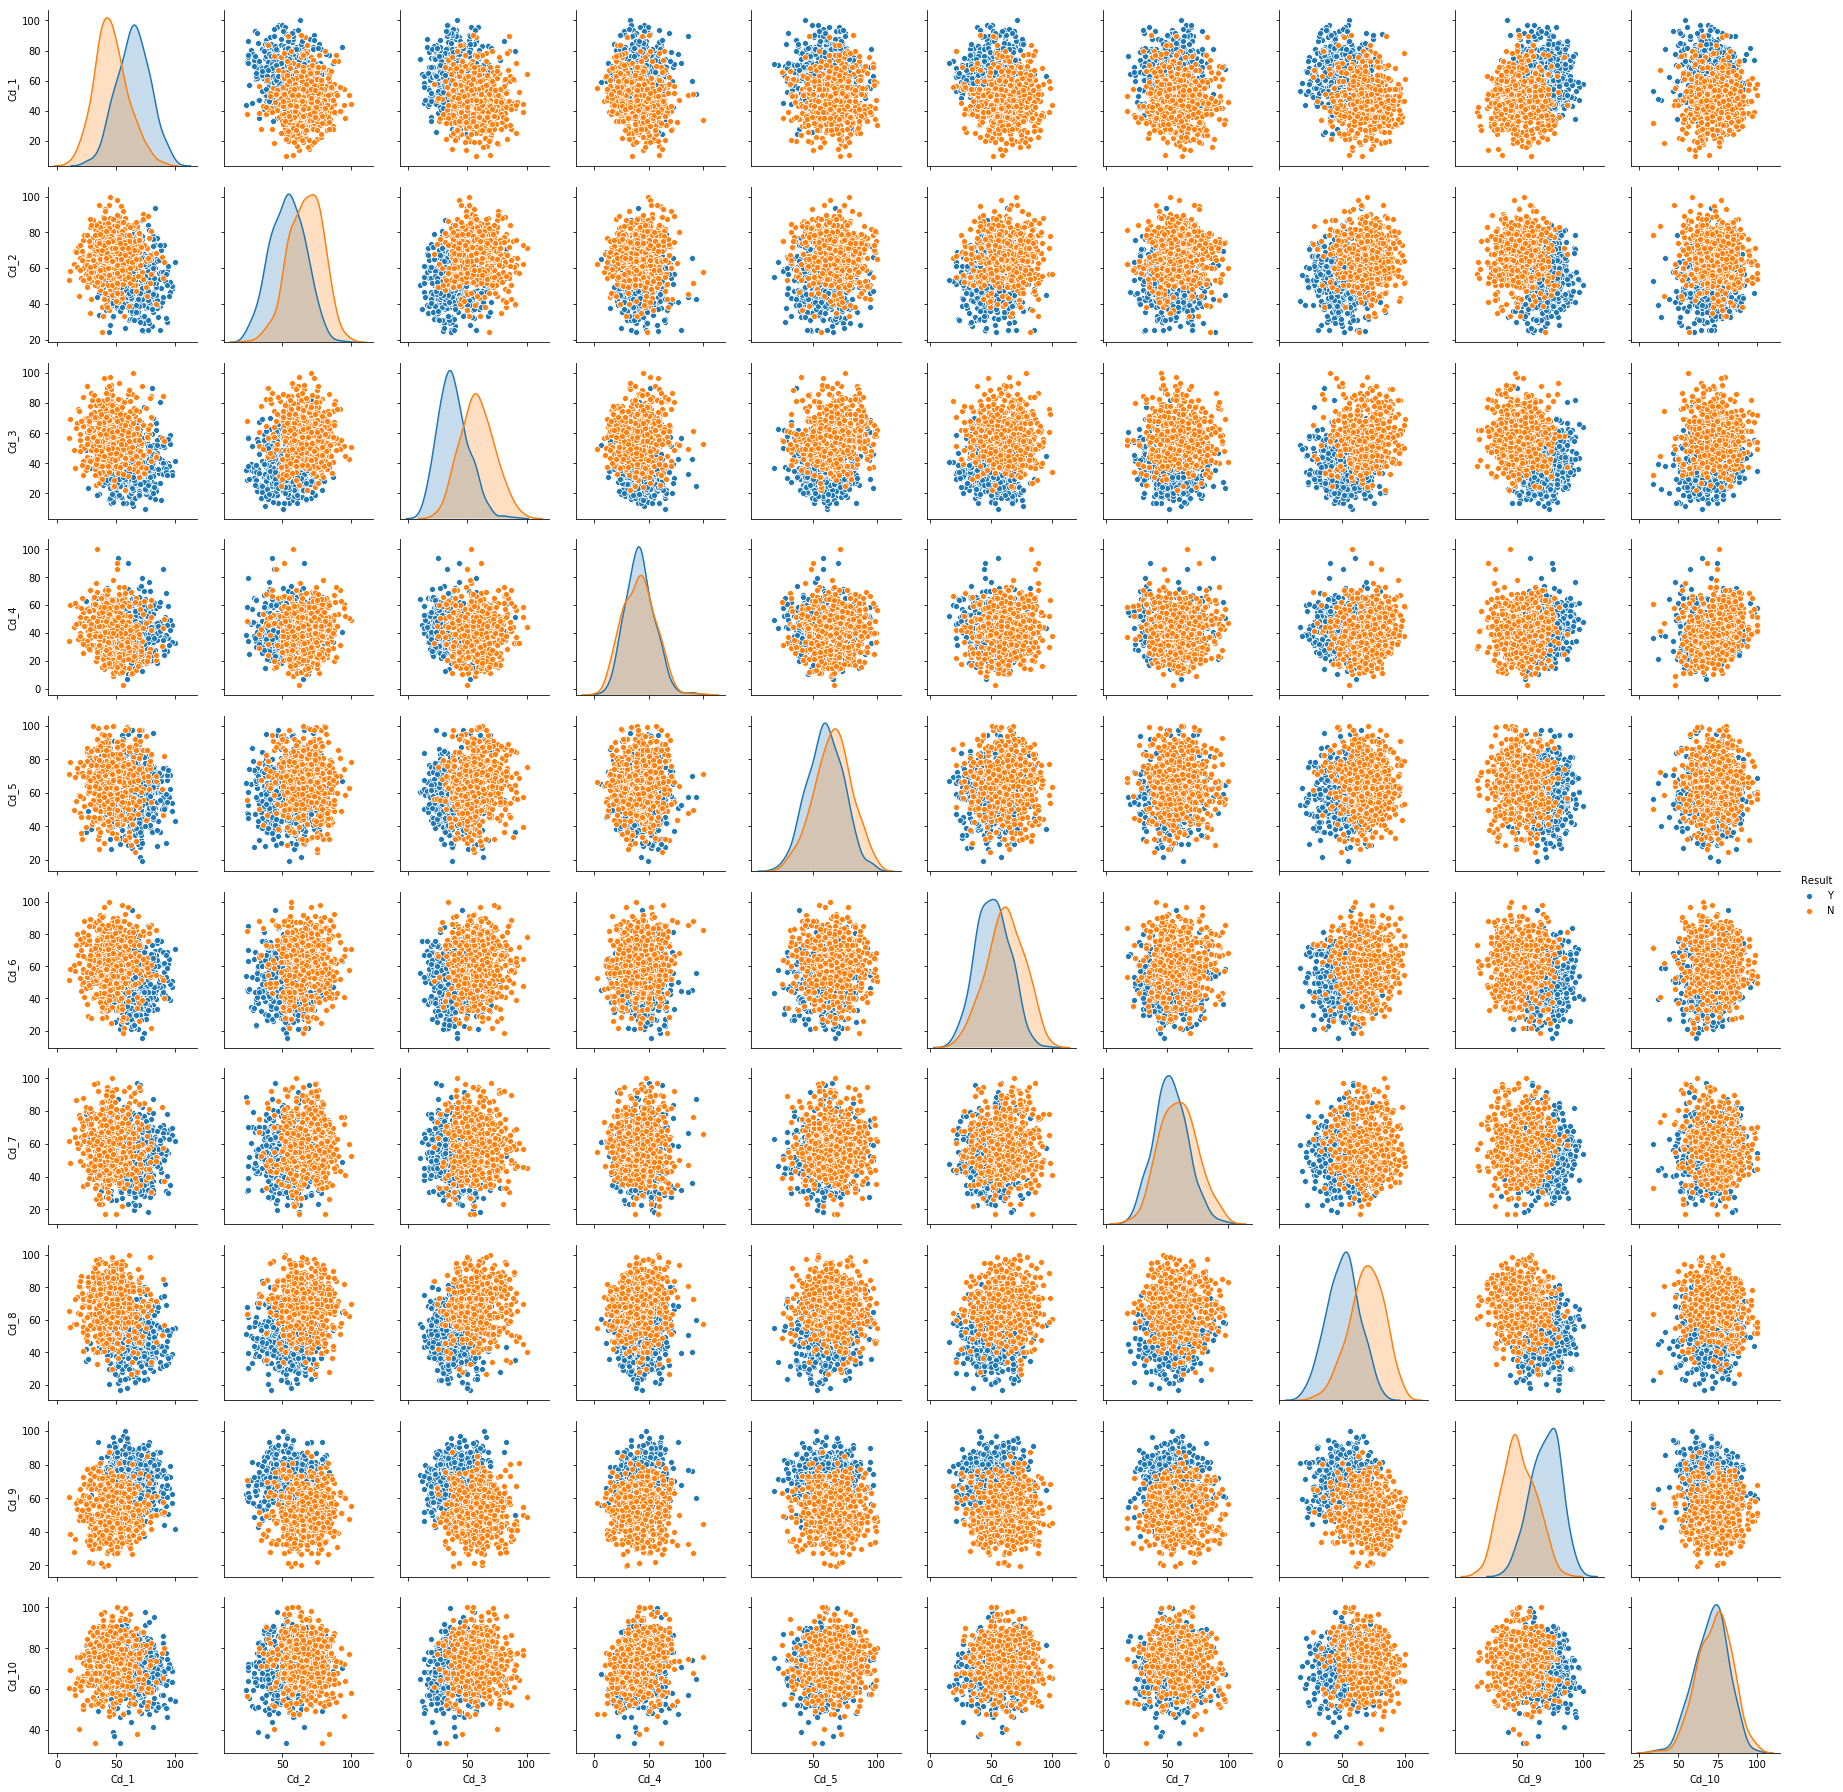

In [6]:
sns.pairplot(df, hue = 'Result')

In [7]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
target = df['Result']
features = df.drop('Result', axis = 1)

In [9]:
features.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9


In [10]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(features)
type(scaled_features)

numpy.ndarray

In [12]:
cols = df.columns[:-1]
cols

Index(['Cd_1', 'Cd_2', 'Cd_3', 'Cd_4', 'Cd_5', 'Cd_6', 'Cd_7', 'Cd_8', 'Cd_9',
       'Cd_10'],
      dtype='object')

In [13]:
df_scaled = pd.DataFrame(data = scaled_features, columns = cols)
df_scaled.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,-0.122525,0.187569,-0.911832,0.318653,-1.035516,-2.305940,-0.801865,-1.480070,-0.952562,-0.645366
1,-1.086028,-0.433403,-1.024151,0.624941,-0.445471,-1.153296,-1.131088,-0.200556,-1.826218,0.635103
2,-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282
3,0.983718,1.058359,-0.622166,0.624941,0.449771,-0.267648,1.751290,1.066595,1.244427,-1.025795
4,1.138354,-0.640394,-0.710839,-0.058864,0.822788,-0.938396,0.595651,-1.473889,1.038861,0.273232


In [14]:
X = scaled_features
y = target

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[134   8]
 [ 12 146]]
              precision    recall  f1-score   support

           N       0.92      0.94      0.93       142
           Y       0.95      0.92      0.94       158

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [25]:
# Initializing an empty list to get the error rate for every k 
err_rate = []

# Let's run the for loop for k from 1 to 30, we can use range() method
for i in range(1,30):
    
    # Initializing knn for k = i
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fitting knn 
    knn.fit(X_train,y_train)
    
    # predicting for k = i
    prediction_i = knn.predict(X_test)
    
    # error rate for k = i - appending to the list 'err_rate'
    # Avg of predictions and y_test if both not equal
    err_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error_Rate')

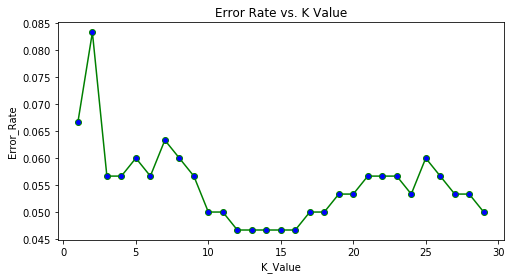

In [26]:
# look at the optimum number of n_neighbors
plt.figure(figsize=(8,4))
plt.plot(range(1,30),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[136   6]
 [  8 150]]
              precision    recall  f1-score   support

           N       0.94      0.96      0.95       142
           Y       0.96      0.95      0.96       158

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

